In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pm').getOrCreate()
from pyspark.sql.types import IntegerType,FloatType
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [2]:
df_bj = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [3]:
df_bj.rename(columns={'pm2.5':'pm'}, inplace = True)

In [4]:
df_bj.describe().astype(np.int64)

,No,year,month,day,hour,pm,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824,43824,43824,43824,43824,41757,43824,43824,43824,43824,43824,43824
mean,21912,2012,6,15,11,98,1,12,1016,23,0,0
std,12651,1,3,8,6,92,14,12,10,50,0,1
min,1,2010,1,1,0,0,-40,-19,991,0,0,0
25%,10956,2011,4,8,5,29,-10,2,1008,1,0,0
50%,21912,2012,7,16,11,72,2,14,1016,5,0,0
75%,32868,2013,10,23,17,137,15,23,1025,21,0,0
max,43824,2014,12,31,23,994,28,42,1046,585,27,36


In [5]:
df_bj.isnull()

,No,year,month,day,hour,pm,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False,False,False


In [6]:
df_bj.dropna(inplace=True)

In [7]:
df_bj.describe().astype(np.int64)

,No,year,month,day,hour,pm,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757,41757,41757,41757,41757,41757,41757,41757,41757,41757,41757,41757
mean,22279,2012,6,15,11,98,1,12,1016,23,0,0
std,12658,1,3,8,6,92,14,12,10,49,0,1
min,25,2010,1,1,0,0,-40,-19,991,0,0,0
25%,11464,2011,4,8,5,29,-10,2,1008,1,0,0
50%,22435,2012,7,16,12,72,2,14,1016,5,0,0
75%,33262,2013,10,23,18,137,15,23,1025,21,0,0
max,43824,2014,12,31,23,994,28,42,1046,565,27,36


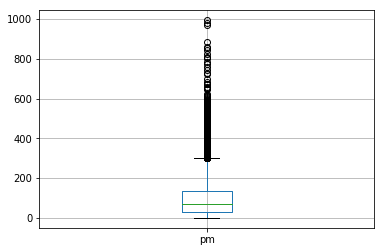

In [8]:
df_bj.boxplot(column='pm')

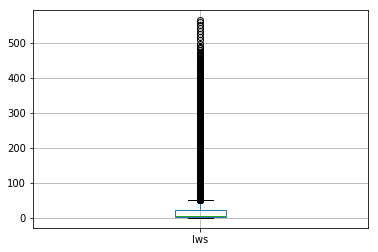

In [9]:
df_bj.boxplot(column='Iws')

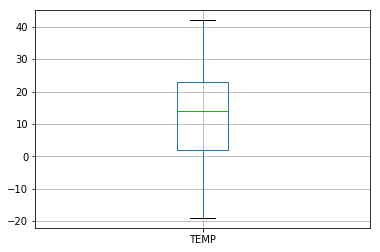

In [10]:
df_bj.boxplot(column='TEMP')

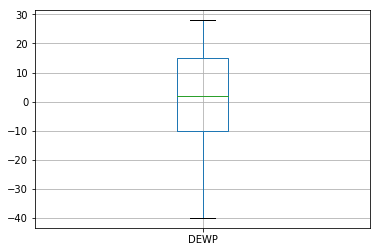

In [11]:
df_bj.boxplot(column='DEWP')

In [12]:
df_bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
No       41757 non-null int64
year     41757 non-null int64
month    41757 non-null int64
day      41757 non-null int64
hour     41757 non-null int64
pm       41757 non-null float64
DEWP     41757 non-null int64
TEMP     41757 non-null float64
PRES     41757 non-null float64
cbwd     41757 non-null object
Iws      41757 non-null float64
Is       41757 non-null int64
Ir       41757 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


In [13]:
df_bj['pm']=df_bj['pm'].astype(np.int64)

In [14]:
df_bj['TEMP']=df_bj['TEMP'].astype(np.int64)

In [15]:
df_bj['PRES']=df_bj['PRES'].astype(np.int64)

In [16]:
df_bj['TEMP']=df_bj['TEMP'].astype(np.int64)

In [17]:
df_bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
No       41757 non-null int64
year     41757 non-null int64
month    41757 non-null int64
day      41757 non-null int64
hour     41757 non-null int64
pm       41757 non-null int64
DEWP     41757 non-null int64
TEMP     41757 non-null int64
PRES     41757 non-null int64
cbwd     41757 non-null object
Iws      41757 non-null float64
Is       41757 non-null int64
Ir       41757 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 4.5+ MB


In [18]:
df_bj.describe().astype(np.int64)

,No,year,month,day,hour,pm,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757,41757,41757,41757,41757,41757,41757,41757,41757,41757,41757,41757
mean,22279,2012,6,15,11,98,1,12,1016,23,0,0
std,12658,1,3,8,6,92,14,12,10,49,0,1
min,25,2010,1,1,0,0,-40,-19,991,0,0,0
25%,11464,2011,4,8,5,29,-10,2,1008,1,0,0
50%,22435,2012,7,16,12,72,2,14,1016,5,0,0
75%,33262,2013,10,23,18,137,15,23,1025,21,0,0
max,43824,2014,12,31,23,994,28,42,1046,565,27,36


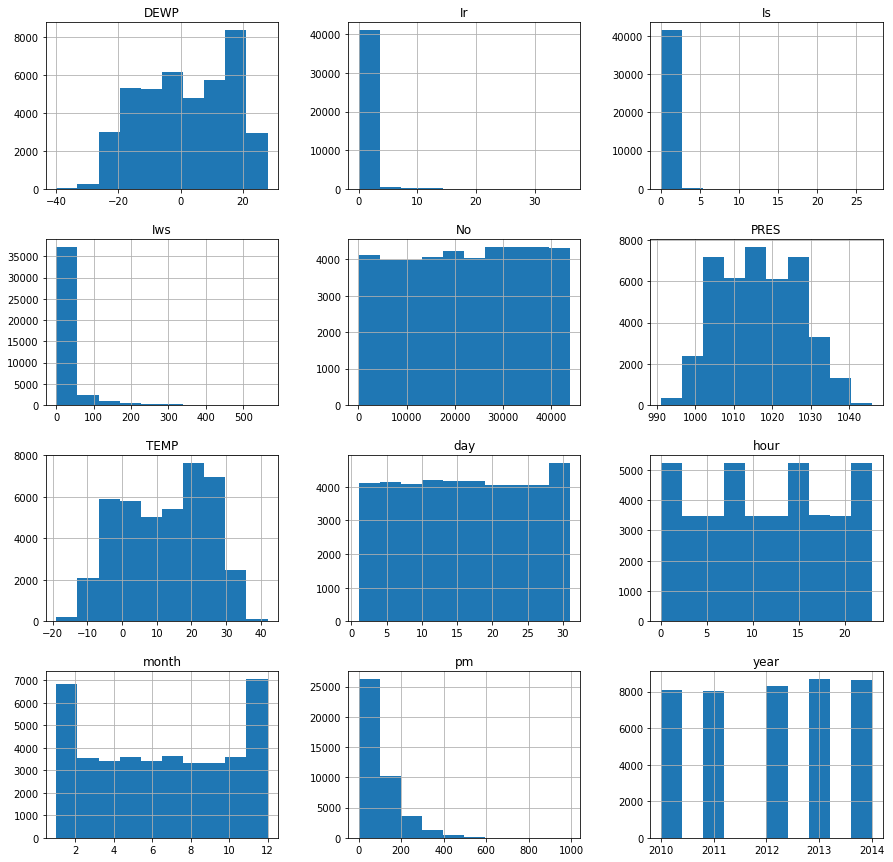

In [19]:
df_bj.select_dtypes(include=['int64']).columns
df_bj.hist(figsize=(15,15))
plt.show()

Text(0.5,1,'pm2.5 over timestamp')

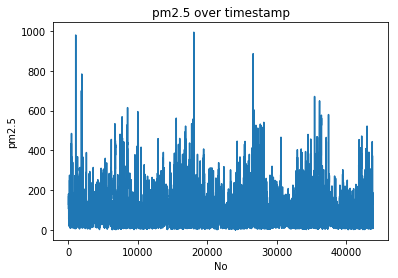

In [20]:
df_bj_timestamp_trend = df_bj.groupby(['No'])['pm'].mean()
df_bj_timestamp_trend.plot()
plt.ylabel('pm2.5')
plt.title('pm2.5 over timestamp')

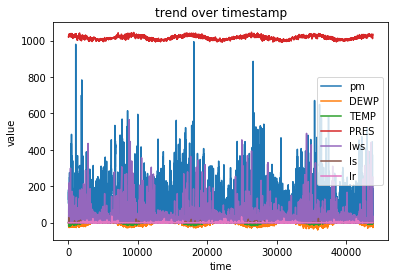

In [21]:
trend = df_bj['pm'].plot()
trend = df_bj['DEWP'].plot()
trend = df_bj['TEMP'].plot()
trend = df_bj['PRES'].plot()
trend = df_bj['Iws'].plot()
trend = df_bj['Is'].plot()
trend = df_bj['Ir'].plot()
plt.title('trend over timestamp')
plt.xlabel('time')
plt.ylabel('value')
plt.legend(loc='best')

In [22]:
df_bj_timestamp = df_bj.groupby(['No'])['pm'].mean()

In [23]:
df_bj['timestamp'] = df_bj['year'].map(str)+'-'+df_bj['month'].map(str)+'-'+df_bj['day'].map(str)+' '+df_bj['hour'].map(str)+':00:00'
df_bj.head(100)

,No,year,month,day,hour,pm,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,timestamp
24,25,2010,1,2,0,129,-16,-4,1020,SE,1.79,0,0,2010-1-2 0:00:00
25,26,2010,1,2,1,148,-15,-4,1020,SE,2.68,0,0,2010-1-2 1:00:00
26,27,2010,1,2,2,159,-11,-5,1021,SE,3.57,0,0,2010-1-2 2:00:00
27,28,2010,1,2,3,181,-7,-5,1022,SE,5.36,1,0,2010-1-2 3:00:00
28,29,2010,1,2,4,138,-7,-5,1022,SE,6.25,2,0,2010-1-2 4:00:00
29,30,2010,1,2,5,109,-7,-6,1022,SE,7.14,3,0,2010-1-2 5:00:00
30,31,2010,1,2,6,105,-7,-6,1023,SE,8.93,4,0,2010-1-2 6:00:00
31,32,2010,1,2,7,124,-7,-5,1024,SE,10.72,0,0,2010-1-2 7:00:00
32,33,2010,1,2,8,120,-8,-6,1024,SE,12.51,0,0,2010-1-2 8:00:00
33,34,2010,1,2,9,132,-7,-5,1025,SE,14.30,0,0,2010-1-2 9:00:00


In [24]:
def get_air_quality_index(pm):
    if pm < 35:
        return '1'
    elif pm < 75:
        return '2'
    elif pm < 115:
        return '3'
    elif pm < 150:
        return '4'
    elif pm < 250:
        return '5'
    else:
        return '6'

In [25]:
df_bj.loc[:, 'air_quality_index'] = df_bj['pm'].apply(get_air_quality_index)
df_bj['air_quality_index']=df_bj['air_quality_index'].astype(np.int64)

In [26]:
df_bj.head(100)

,No,year,month,day,hour,pm,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,timestamp,air_quality_index
24,25,2010,1,2,0,129,-16,-4,1020,SE,1.79,0,0,2010-1-2 0:00:00,4
25,26,2010,1,2,1,148,-15,-4,1020,SE,2.68,0,0,2010-1-2 1:00:00,4
26,27,2010,1,2,2,159,-11,-5,1021,SE,3.57,0,0,2010-1-2 2:00:00,5
27,28,2010,1,2,3,181,-7,-5,1022,SE,5.36,1,0,2010-1-2 3:00:00,5
28,29,2010,1,2,4,138,-7,-5,1022,SE,6.25,2,0,2010-1-2 4:00:00,4
29,30,2010,1,2,5,109,-7,-6,1022,SE,7.14,3,0,2010-1-2 5:00:00,3
30,31,2010,1,2,6,105,-7,-6,1023,SE,8.93,4,0,2010-1-2 6:00:00,3
31,32,2010,1,2,7,124,-7,-5,1024,SE,10.72,0,0,2010-1-2 7:00:00,4
32,33,2010,1,2,8,120,-8,-6,1024,SE,12.51,0,0,2010-1-2 8:00:00,4
33,34,2010,1,2,9,132,-7,-5,1025,SE,14.30,0,0,2010-1-2 9:00:00,4


In [27]:
df_bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 15 columns):
No                   41757 non-null int64
year                 41757 non-null int64
month                41757 non-null int64
day                  41757 non-null int64
hour                 41757 non-null int64
pm                   41757 non-null int64
DEWP                 41757 non-null int64
TEMP                 41757 non-null int64
PRES                 41757 non-null int64
cbwd                 41757 non-null object
Iws                  41757 non-null float64
Is                   41757 non-null int64
Ir                   41757 non-null int64
timestamp            41757 non-null object
air_quality_index    41757 non-null int64
dtypes: float64(1), int64(12), object(2)
memory usage: 5.1+ MB


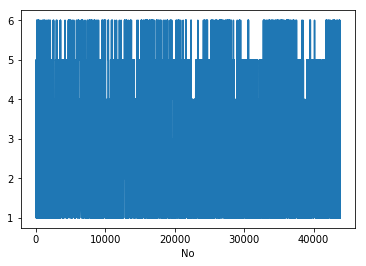

In [28]:
df_bj.groupby(['No'])['air_quality_index'].mean().plot()

In [29]:
def get_season(month):
    if month < 4:
        return 'winter'
    elif month < 7:
        return 'spring'
    elif month < 10:
        return 'summer'
    else:
        return 'autumn'

In [30]:
df_bj.loc[:, 'season'] = df_bj['month'].apply(get_season)

In [31]:
df_bj.head(100)

,No,year,month,day,hour,pm,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,timestamp,air_quality_index,season
24,25,2010,1,2,0,129,-16,-4,1020,SE,1.79,0,0,2010-1-2 0:00:00,4,winter
25,26,2010,1,2,1,148,-15,-4,1020,SE,2.68,0,0,2010-1-2 1:00:00,4,winter
26,27,2010,1,2,2,159,-11,-5,1021,SE,3.57,0,0,2010-1-2 2:00:00,5,winter
27,28,2010,1,2,3,181,-7,-5,1022,SE,5.36,1,0,2010-1-2 3:00:00,5,winter
28,29,2010,1,2,4,138,-7,-5,1022,SE,6.25,2,0,2010-1-2 4:00:00,4,winter
29,30,2010,1,2,5,109,-7,-6,1022,SE,7.14,3,0,2010-1-2 5:00:00,3,winter
30,31,2010,1,2,6,105,-7,-6,1023,SE,8.93,4,0,2010-1-2 6:00:00,3,winter
31,32,2010,1,2,7,124,-7,-5,1024,SE,10.72,0,0,2010-1-2 7:00:00,4,winter
32,33,2010,1,2,8,120,-8,-6,1024,SE,12.51,0,0,2010-1-2 8:00:00,4,winter
33,34,2010,1,2,9,132,-7,-5,1025,SE,14.30,0,0,2010-1-2 9:00:00,4,winter


In [32]:
df_bj_sub=df_bj.drop(columns = ['No'])
df_bj = df_bj_sub

In [33]:
df_bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 15 columns):
year                 41757 non-null int64
month                41757 non-null int64
day                  41757 non-null int64
hour                 41757 non-null int64
pm                   41757 non-null int64
DEWP                 41757 non-null int64
TEMP                 41757 non-null int64
PRES                 41757 non-null int64
cbwd                 41757 non-null object
Iws                  41757 non-null float64
Is                   41757 non-null int64
Ir                   41757 non-null int64
timestamp            41757 non-null object
air_quality_index    41757 non-null int64
season               41757 non-null object
dtypes: float64(1), int64(11), object(3)
memory usage: 5.1+ MB


In [34]:
df_bj_year = df_bj.groupby(['year'])['pm'].mean()

In [35]:
df_bj_year

year
2010    104.045730
2011     99.071340
2012     90.545871
2013    101.712376
2014     97.734557
Name: pm, dtype: float64

Text(0,0.5,'mean of pm2.5')

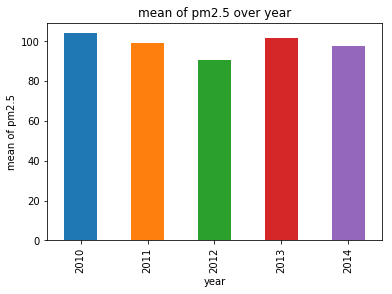

In [36]:
df_bj_year.plot.bar()
plt.title('mean of pm2.5 over year')
plt.ylabel('mean of pm2.5')

Text(0,0.5,'count')

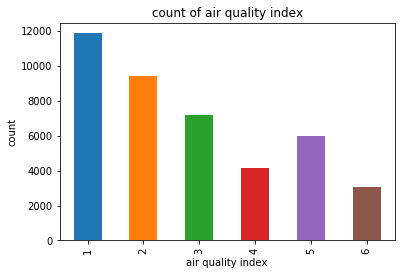

In [37]:
df_bj.groupby(['air_quality_index'])['air_quality_index'].count().plot(kind='bar')
plt.title('count of air quality index')
plt.xlabel('air quality index')
plt.ylabel('count')

Text(0,0.5,'count')

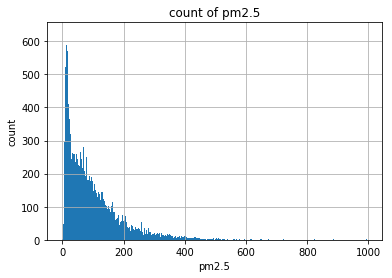

In [38]:
df_bj['pm'].hist(bins=1000)
plt.title('count of pm2.5')
plt.xlabel('pm2.5')
plt.ylabel('count')

Text(0,0.5,'mean')

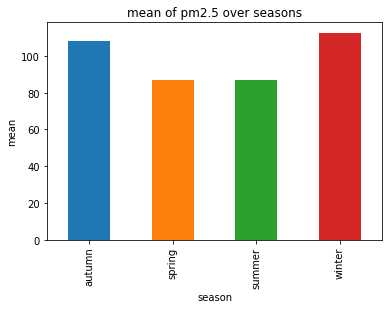

In [39]:
df_bj.groupby(['season'])['pm'].mean().plot.bar()
plt.title('mean of pm2.5 over seasons')
plt.xlabel('season')
plt.ylabel('mean')

In [40]:
def get_quality(air_quality_index):
    if air_quality_index < 4:
        return 'good'
    else:
        return 'bad'

In [41]:
df_bj.loc[:, 'quality'] = df_bj['air_quality_index'].apply(get_quality)

In [42]:
df_bj.head(10)

,year,month,day,hour,pm,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,timestamp,air_quality_index,season,quality
24,2010,1,2,0,129,-16,-4,1020,SE,1.79,0,0,2010-1-2 0:00:00,4,winter,bad
25,2010,1,2,1,148,-15,-4,1020,SE,2.68,0,0,2010-1-2 1:00:00,4,winter,bad
26,2010,1,2,2,159,-11,-5,1021,SE,3.57,0,0,2010-1-2 2:00:00,5,winter,bad
27,2010,1,2,3,181,-7,-5,1022,SE,5.36,1,0,2010-1-2 3:00:00,5,winter,bad
28,2010,1,2,4,138,-7,-5,1022,SE,6.25,2,0,2010-1-2 4:00:00,4,winter,bad
29,2010,1,2,5,109,-7,-6,1022,SE,7.14,3,0,2010-1-2 5:00:00,3,winter,good
30,2010,1,2,6,105,-7,-6,1023,SE,8.93,4,0,2010-1-2 6:00:00,3,winter,good
31,2010,1,2,7,124,-7,-5,1024,SE,10.72,0,0,2010-1-2 7:00:00,4,winter,bad
32,2010,1,2,8,120,-8,-6,1024,SE,12.51,0,0,2010-1-2 8:00:00,4,winter,bad
33,2010,1,2,9,132,-7,-5,1025,SE,14.30,0,0,2010-1-2 9:00:00,4,winter,bad


In [43]:
df_bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 16 columns):
year                 41757 non-null int64
month                41757 non-null int64
day                  41757 non-null int64
hour                 41757 non-null int64
pm                   41757 non-null int64
DEWP                 41757 non-null int64
TEMP                 41757 non-null int64
PRES                 41757 non-null int64
cbwd                 41757 non-null object
Iws                  41757 non-null float64
Is                   41757 non-null int64
Ir                   41757 non-null int64
timestamp            41757 non-null object
air_quality_index    41757 non-null int64
season               41757 non-null object
quality              41757 non-null object
dtypes: float64(1), int64(11), object(4)
memory usage: 5.4+ MB


Text(0,0.5,'value')

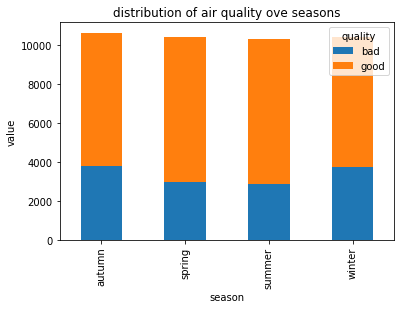

In [44]:
pd.crosstab(df_bj.season, df_bj.quality).plot(kind='bar', stacked=True)
plt.title('distribution of air quality ove seasons')
plt.xlabel('season')
plt.ylabel('value')

In [45]:
sort = df_bj.sort_values(by='pm', ascending=False).head(100)

Text(0,0.5,'count')

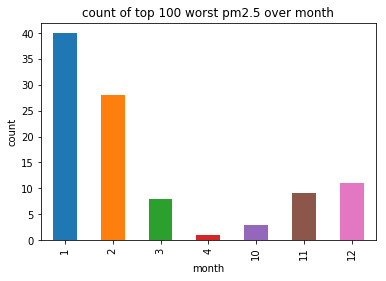

In [46]:
sort.groupby(['month'])['pm'].count().plot.bar()
plt.title('count of top 100 worst pm2.5 over month')
plt.xlabel('month')
plt.ylabel('count')

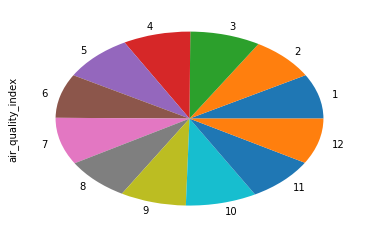

In [47]:
df_bj.groupby(['month'])['air_quality_index'].count().plot(kind='pie', stacked=True)

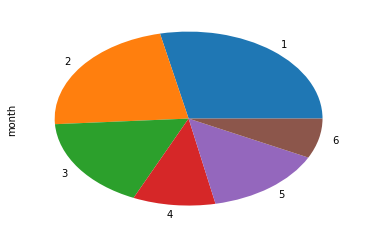

In [48]:
df_bj.groupby(['air_quality_index'])['month'].count().plot(kind='pie', stacked=True)

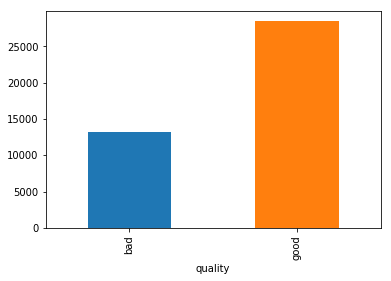

In [49]:
df_bj.groupby(['quality'])['quality'].count().plot(kind='bar')

In [50]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pm').getOrCreate()
from pyspark.sql.types import IntegerType,FloatType
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [51]:
sp = spark.createDataFrame(df_bj)

In [52]:
sp.printSchema()

root
 |-- year: long (nullable = true)
 |-- month: long (nullable = true)
 |-- day: long (nullable = true)
 |-- hour: long (nullable = true)
 |-- pm: long (nullable = true)
 |-- DEWP: long (nullable = true)
 |-- TEMP: long (nullable = true)
 |-- PRES: long (nullable = true)
 |-- cbwd: string (nullable = true)
 |-- Iws: double (nullable = true)
 |-- Is: long (nullable = true)
 |-- Ir: long (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- air_quality_index: long (nullable = true)
 |-- season: string (nullable = true)
 |-- quality: string (nullable = true)



In [53]:
sp = sp.withColumn("year", sp["year"].cast(IntegerType()))
sp = sp.withColumn("month", sp["month"].cast(IntegerType()))
sp = sp.withColumn("day", sp["day"].cast(IntegerType()))
sp = sp.withColumn("pm", sp["pm"].cast(IntegerType()))
sp = sp.withColumn("DEWP", sp["DEWP"].cast(IntegerType()))
sp = sp.withColumn("TEMP", sp["TEMP"].cast(IntegerType()))
sp = sp.withColumn("PRES", sp["PRES"].cast(IntegerType()))
sp = sp.withColumn("Iws", sp["Iws"].cast(FloatType()))
sp = sp.withColumn("Is", sp["Is"].cast(IntegerType()))
sp = sp.withColumn("Ir", sp["Ir"].cast(IntegerType()))
sp = sp.withColumn("air_quality_index", sp["air_quality_index"].cast(IntegerType()))

In [54]:
sp.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: long (nullable = true)
 |-- pm: integer (nullable = true)
 |-- DEWP: integer (nullable = true)
 |-- TEMP: integer (nullable = true)
 |-- PRES: integer (nullable = true)
 |-- cbwd: string (nullable = true)
 |-- Iws: float (nullable = true)
 |-- Is: integer (nullable = true)
 |-- Ir: integer (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- air_quality_index: integer (nullable = true)
 |-- season: string (nullable = true)
 |-- quality: string (nullable = true)



In [55]:
sp.show()

+----+-----+---+----+---+----+----+----+----+-----+---+---+-----------------+-----------------+------+-------+
|year|month|day|hour| pm|DEWP|TEMP|PRES|cbwd|  Iws| Is| Ir|        timestamp|air_quality_index|season|quality|
+----+-----+---+----+---+----+----+----+----+-----+---+---+-----------------+-----------------+------+-------+
|2010|    1|  2|   0|129| -16|  -4|1020|  SE| 1.79|  0|  0| 2010-1-2 0:00:00|                4|winter|    bad|
|2010|    1|  2|   1|148| -15|  -4|1020|  SE| 2.68|  0|  0| 2010-1-2 1:00:00|                4|winter|    bad|
|2010|    1|  2|   2|159| -11|  -5|1021|  SE| 3.57|  0|  0| 2010-1-2 2:00:00|                5|winter|    bad|
|2010|    1|  2|   3|181|  -7|  -5|1022|  SE| 5.36|  1|  0| 2010-1-2 3:00:00|                5|winter|    bad|
|2010|    1|  2|   4|138|  -7|  -5|1022|  SE| 6.25|  2|  0| 2010-1-2 4:00:00|                4|winter|    bad|
|2010|    1|  2|   5|109|  -7|  -6|1022|  SE| 7.14|  3|  0| 2010-1-2 5:00:00|                3|winter|   good|
|

In [56]:
cbwd_indexer = StringIndexer(inputCol='cbwd',outputCol='cbwdIndex')
cbwd_encoder = OneHotEncoder(inputCol='cbwdIndex',outputCol='cbwdVec')
assembler = VectorAssembler(inputCols=['month','day','pm','hour','DEWP',
                                       'TEMP','PRES','cbwdVec','Iws',
                                       'Is', 'Ir'], outputCol="classificationFeatures")
pipeline = Pipeline(stages=[cbwd_indexer, cbwd_encoder, assembler])
pipeline_model = pipeline.fit(sp)
pipe_sp = pipeline_model.transform(sp)
pipe_sp = pipe_sp.select('air_quality_index', 'classificationFeatures')

In [57]:
train_data, test_data = pipe_sp.randomSplit([0.7,0.3])
mlr_model = LogisticRegression(featuresCol='classificationFeatures',labelCol='air_quality_index', family='multinomial',maxIter=10, regParam=0, elasticNetParam=0)
mlr_model = mlr_model.fit(train_data)
results = mlr_model.transform(test_data)
results.select("prediction", "air_quality_index", "classificationFeatures").show()
evaluator = MulticlassClassificationEvaluator(
    labelCol="air_quality_index", predictionCol="prediction", metricName="accuracy")
lRAccuracy = evaluator.evaluate(results)
print("Accuray = %g " %lRAccuracy)
print("Test Error = %g " %(1.0 - lRAccuracy))

+----------+-----------------+----------------------+
|prediction|air_quality_index|classificationFeatures|
+----------+-----------------+----------------------+
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                

In [58]:
mlr_model.coefficientMatrix

DenseMatrix(7, 13, [-0.0001, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0014, -0.0002, ..., -0.0139, -0.0006, -0.0809, -0.1116, 0.2064, -0.0023, 0.0032, -0.023], 1)

In [59]:
mlr_model.interceptVector

DenseVector([-7.1939, 1.824, 1.6048, 1.3447, 0.7852, 1.1345, 0.5007])

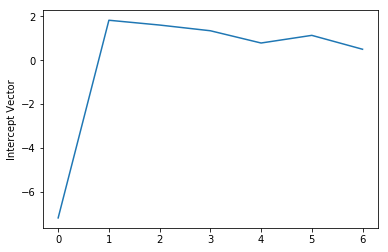

In [60]:
plt.plot(mlr_model.interceptVector)
plt.ylabel('Intercept Vector')
plt.show()

In [61]:
cbwd_indexer = StringIndexer(inputCol='cbwd',outputCol='cbwdIndex')
quality_index =  StringIndexer(inputCol='quality',outputCol='logisticRLabel')
cbwd_encoder = OneHotEncoder(inputCol='cbwdIndex',outputCol='cbwdVec')
assembler = VectorAssembler(inputCols=['month','day','hour','DEWP',
                                       'TEMP','PRES','cbwdVec','Iws',
                                       'Is', 'Ir'], outputCol="logisticRLabelFeatures")
pipeline = Pipeline(stages=[cbwd_indexer, quality_index,cbwd_encoder, assembler])
pipeline_model = pipeline.fit(sp)
pipe_sp = pipeline_model.transform(sp)
pipe_sp = pipe_sp.select('logisticRLabel', 'logisticRLabelFeatures')

In [62]:
train_data, test_data = pipe_sp.randomSplit([0.7,0.3])
logisticR_model = LogisticRegression(featuresCol='logisticRLabelFeatures',labelCol='logisticRLabel',maxIter=5, regParam=0, elasticNetParam=0)
logisticR_model = logisticR_model.fit(train_data)
results = logisticR_model.transform(test_data)

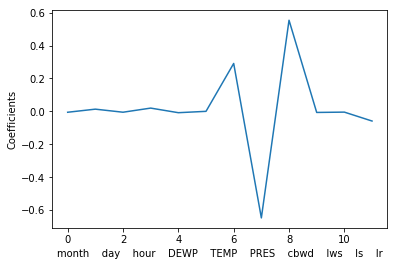

In [63]:
plt.plot(logisticR_model.coefficients)
plt.xlabel('month    day    hour    DEWP    TEMP    PRES    cbwd    Iws    Is    Ir')
plt.ylabel('Coefficients')
plt.show()

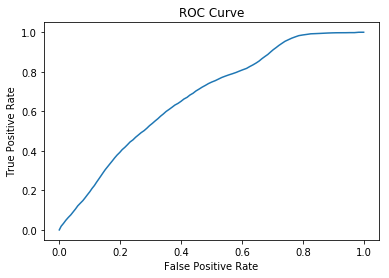

In [64]:
training_summary = logisticR_model.summary
ROC = training_summary.roc.toPandas()
plt.plot(ROC['FPR'],ROC['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

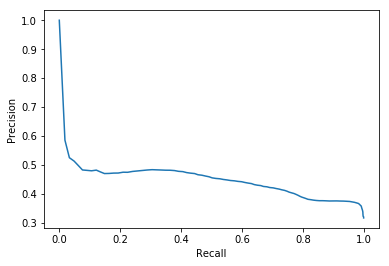

In [65]:
pr = training_summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [66]:
results.select("prediction", "logisticRLabel", "logisticRLabelFeatures").show()
evaluator = MulticlassClassificationEvaluator(
    labelCol="logisticRLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print("Accuray = %g " %accuracy)
print("Test Error = %g " %(1.0 - accuracy))

+----------+--------------+----------------------+
|prediction|logisticRLabel|logisticRLabelFeatures|
+----------+--------------+----------------------+
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (12,[0,1,2,3,5,9]...|
|       0.0|           0.0|  (1

In [67]:
sp.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: long (nullable = true)
 |-- pm: integer (nullable = true)
 |-- DEWP: integer (nullable = true)
 |-- TEMP: integer (nullable = true)
 |-- PRES: integer (nullable = true)
 |-- cbwd: string (nullable = true)
 |-- Iws: float (nullable = true)
 |-- Is: integer (nullable = true)
 |-- Ir: integer (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- air_quality_index: integer (nullable = true)
 |-- season: string (nullable = true)
 |-- quality: string (nullable = true)



In [68]:
vector_assembler = VectorAssembler(inputCols = ['month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir'], outputCol = 'features')
vector_output = vector_assembler.transform(sp)
vector_output.printSchema()
vector_output.head(1)

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: long (nullable = true)
 |-- pm: integer (nullable = true)
 |-- DEWP: integer (nullable = true)
 |-- TEMP: integer (nullable = true)
 |-- PRES: integer (nullable = true)
 |-- cbwd: string (nullable = true)
 |-- Iws: float (nullable = true)
 |-- Is: integer (nullable = true)
 |-- Ir: integer (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- air_quality_index: integer (nullable = true)
 |-- season: string (nullable = true)
 |-- quality: string (nullable = true)
 |-- features: vector (nullable = true)



[Row(year=2010, month=1, day=2, hour=0, pm=129, DEWP=-16, TEMP=-4, PRES=1020, cbwd='SE', Iws=1.7899999618530273, Is=0, Ir=0, timestamp='2010-1-2 0:00:00', air_quality_index=4, season='winter', quality='bad', features=DenseVector([1.0, 2.0, 0.0, -16.0, -4.0, 1020.0, 1.79, 0.0, 0.0]))]

In [69]:
vector_output = vector_output.select(['features', 'pm'])
print(vector_output.head(1))
vector_output.show(3)

[Row(features=DenseVector([1.0, 2.0, 0.0, -16.0, -4.0, 1020.0, 1.79, 0.0, 0.0]), pm=129)]
+--------------------+---+
|            features| pm|
+--------------------+---+
|[1.0,2.0,0.0,-16....|129|
|[1.0,2.0,1.0,-15....|148|
|[1.0,2.0,2.0,-11....|159|
+--------------------+---+
only showing top 3 rows



In [70]:
train_data,test_data = vector_output.randomSplit([0.7,0.3])
lr = LinearRegression(featuresCol='features', labelCol='pm', maxIter=100, regParam=0.0, elasticNetParam=0.0, fitIntercept=True)
lr_model = lr.fit(train_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept) + "\n")
training_summary = lr_model.summary
print("RMSE: " + str(training_summary.rootMeanSquaredError))
print("R2: " + str(training_summary.r2))

Coefficients: [-1.5882071332473593,0.7968814807342574,1.629413634250548,4.785103893779873,-6.666036741528665,-1.5438454445629004,-0.25236516669955,-2.7714453396111036,-7.43040046512815]
Intercept: 1728.87656601548

RMSE: 79.60077300848253
R2: 0.26058845320388113


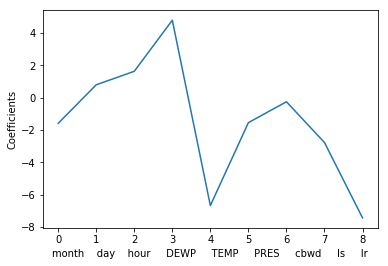

In [71]:
plt.plot(lr_model.coefficients)
plt.xlabel('month    day    hour     DEWP     TEMP     PRES     cbwd     Is     Ir')
plt.ylabel('Coefficients')
plt.show()

In [72]:
train_data.describe().show()

+-------+-----------------+
|summary|               pm|
+-------+-----------------+
|  count|            29141|
|   mean|98.41196252702377|
| stddev|92.57242122009784|
|    min|                0|
|    max|              994|
+-------+-----------------+



In [73]:
test_results = lr_model.evaluate(test_data)
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

RMSE on test data: 78.53504219437185
R2 on test data: 0.2524253412187508


In [74]:
cbwd_indexer = StringIndexer(inputCol='cbwd',outputCol='cbwdIndex')
cbwd_encoder = OneHotEncoder(inputCol='cbwdIndex',outputCol='cbwdVec')
assembler = VectorAssembler(inputCols=['month','day','hour','pm','DEWP',
                                       'TEMP','PRES','cbwdVec','Iws',
                                       'Is', 'Ir'], outputCol="classificationFeatures")
pipeline = Pipeline(stages=[cbwd_indexer, cbwd_encoder, assembler])
pipeline_model = pipeline.fit(sp)
pipe_sp = pipeline_model.transform(sp)
pipe_sp = pipe_sp.select('air_quality_index', 'classificationFeatures')
train_data, test_data = pipe_sp.randomSplit([0.7,0.3])

In [75]:
dt = DecisionTreeClassifier(labelCol="air_quality_index", featuresCol="classificationFeatures", maxDepth=15, maxBins=128, minInstancesPerNode=2, minInfoGain=0.0, maxMemoryInMB=256, cacheNodeIds=False, checkpointInterval=10, impurity="gini", seed=None)
dt_model = dt.fit(train_data)

In [76]:
predictions = dt_model.transform(test_data)
predictions.select("prediction", "air_quality_index", "classificationFeatures").show()
evaluator = MulticlassClassificationEvaluator(
    labelCol="air_quality_index", predictionCol="prediction", metricName="accuracy")
dTAccuracy = evaluator.evaluate(predictions)
print("Accuray = %g " %dTAccuracy)
print("Test Error = %g " % (1.0 - dTAccuracy ))

+----------+-----------------+----------------------+
|prediction|air_quality_index|classificationFeatures|
+----------+-----------------+----------------------+
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                

In [77]:
print(dt_model)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_485e9b370088c3a706fe) of depth 15 with 215 nodes


In [78]:
rf = RandomForestClassifier(labelCol="air_quality_index", featuresCol="classificationFeatures", numTrees=10, maxDepth=10, seed=10)

In [79]:
rf_model = rf.fit(train_data)

In [80]:
predictions = rf_model.transform(test_data)
predictions.select("prediction", "air_quality_index", "classificationFeatures").show()
evaluator = MulticlassClassificationEvaluator(
    labelCol="air_quality_index", predictionCol="prediction", metricName="accuracy")
rFAccuracy = evaluator.evaluate(predictions)
print("Accuray = %g " %rFAccuracy)
print("Test Error = %g " % (1.0 - rFAccuracy))

+----------+-----------------+----------------------+
|prediction|air_quality_index|classificationFeatures|
+----------+-----------------+----------------------+
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       2.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                1|  (13,[0,1,2,3,4,6,...|
|       1.0|                